<a href="https://colab.research.google.com/github/AtharvaTambat/WnCC-SoC-2022-QML/blob/main/Swapping_Qubits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Swapping Qubits**

## **1. Installing Necessary Libraries**

In [2]:
import matplotlib.pyplot as plt
import math
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.providers.aer import AerSimulator
from qiskit.visualization import plot_histogram

# Use Aer's qasm_simulator
simulator = AerSimulator()

## **2. The Circuit**

In [4]:
# Creating the circuit
swap = QuantumCircuit(2,2)

# Giving Initial conditions (for the sake of demonstration)
swap.x(0) 
swap.barrier()
# NOTE: q_0 = |1> and q_1 = |0> for this demonstration 
# The desired output is |01>

# Applying necessary gates
swap.cnot(0,1)
swap.cnot(1,0)
swap.cnot(0,1)

swap.barrier()

# Measuring the qubits
swap.measure([0,1],[1,0]) # Measuring so that the read value is in correct order (correcting for the fact the Qiskit states the qubit in the lower classical wire)

# Drawing the circuit
swap.draw()

┌───┐ ░      ┌───┐      ░ ┌─┐   
q_0: ┤ X ├─░───■──┤ X ├──■───░─┤M├───
     └───┘ ░ ┌─┴─┐└─┬─┘┌─┴─┐ ░ └╥┘┌─┐
q_1: ──────░─┤ X ├──■──┤ X ├─░──╫─┤M├
           ░ └───┘     └───┘ ░  ║ └╥┘
c: 2/═══════════════════════════╩══╩═
                                1  0

Total count for possible combinations of output are:  {'01': 1024}


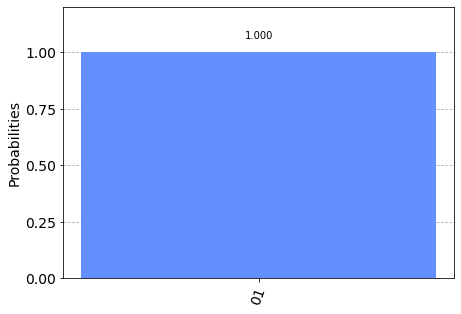

In [5]:
# Compiling the circuit
compiled_circuit = transpile(swap, simulator)

shots = 1000000
# Execute the circuit on the qasm simulator
job = simulator.run(compiled_circuit, shots)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(swap)
print("Total count for possible combinations of output are: ", counts)

# Plot a histogram
plot_histogram(counts)

😇 We got the desired result 😇